In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('Customer-Churn.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


Transformação de dados de forma manual

In [5]:
traducao_dic = {
    'Sim': 1,
    'Nao': 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


Transformação pelo get_dummies

In [6]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis =1))

# junção com dados anteriores

dados_final = pd.concat([dadosmodificados, dummie_dados], axis = 1)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
dados_final.shape

(7043, 39)

In [9]:
pd.set_option('display.max_columns', 39)

In [10]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


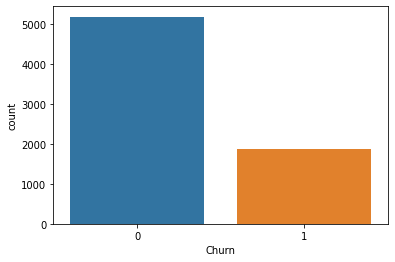

In [11]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [12]:
# !pip install -U imbalanced-learn

In [13]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

x = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [14]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
x, y = smt.fit_resample(x, y)  # Realiza a reamostragem do conjunto de dados

In [15]:
dados_final = pd.concat([x, y], axis=1)  # Concatena a variável target (y) com as features (x)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


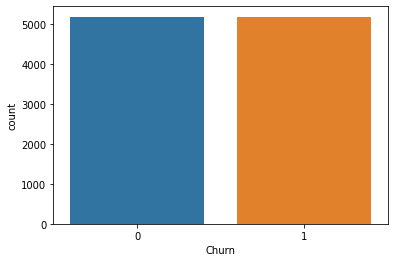

In [16]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## KNN

In [17]:
xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [18]:
# divisão em inputs e outpusts
x = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [19]:
# biblioteca para padronização
from sklearn.preprocessing import StandardScaler

In [20]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

In [21]:
x_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81465673, -0.41350409,
       -1.10771299, -1.32176003, -0.88499468,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18667256, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30292044, -0.47882211, -0.4360152 ])

In [22]:
# normalizando a Maria

xmaria_normalizado = norm.transform(pd.DataFrame(xmaria, columns = x.columns))
xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673, -0.41350409,
        -1.14937735, -0.97235319,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18667256, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76750657, -0.47882211,  2.293498  ]])

Distância Euclidiana

# Implementando o Modelo

In [23]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [24]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

### Treino e Teste

In [25]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

In [27]:
#treinando o modelo com os dados de treino
knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [28]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(x_teste)

In [29]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

### Método probabilístico

##### Naive Bayes - Bernoulli Naive Bayes

##### Treinamento e teste

In [30]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB
import numpy as np

In [31]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
mediana = np.median(x_treino)
mediana

-0.4461759755508453

In [32]:
#criamos o modelo
bnb = BernoulliNB(binarize=mediana)

In [33]:
x_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ]])

In [34]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [35]:
#treinar o modelo
bnb.fit(x_treino, y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [36]:
#testar o modelo
predito_BNb = bnb.predict(x_teste)

In [37]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

### Árvore de Decisão

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
# treinar o modelo
dtc.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [41]:
# verificar a importância de cada atributo
dtc.feature_importances_

array([0.02070208, 0.01349543, 0.0068095 , 0.02090223, 0.01492519,
       0.16169616, 0.22580293, 0.00889189, 0.00344576, 0.01122927,
       0.0019815 , 0.03128648, 0.00065123, 0.01251806, 0.        ,
       0.0145619 , 0.00784856, 0.        , 0.0097366 , 0.01125643,
       0.        , 0.00735279, 0.0143391 , 0.00396098, 0.01956256,
       0.00262135, 0.        , 0.00203258, 0.0082409 , 0.0003825 ,
       0.01088157, 0.03622159, 0.16358635, 0.07445054, 0.01664409,
       0.02129506, 0.02179021, 0.01889663])

In [42]:
predito_ArvoreDecisao = dtc.predict(x_teste)

In [43]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Validação dos Modelos

#### Matriz de Confusão

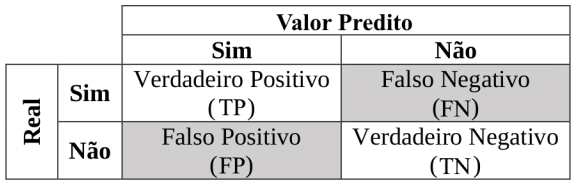

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 251 1285]]


In [46]:
print(confusion_matrix(y_teste, predito_BNb))

[[1048  521]
 [ 240 1296]]


In [47]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 279 1257]]


#### Acurácia

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
# modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8135265700483092


In [50]:
# modelo Bernoulli de Naive Bayes
print(accuracy_score(y_teste, predito_BNb))

0.7549114331723027


In [51]:
# modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8074074074074075


#### Precisão
-> Calcula quantos foram classificados corretamente como Positivos

In [52]:
from sklearn.metrics import precision_score as ps

In [53]:
# modelo KNN
print(ps(y_teste, predito_knn))

0.796652200867948


In [54]:
# modelo Bernoulli de Naive Bayes
print(ps(y_teste, predito_BNb))

0.71326362135388


In [55]:
# modelo árvore de decisão
print(ps(y_teste, predito_ArvoreDecisao))

0.7975888324873096


### Recall
-> Calcula o quão bom o modelo está para classificar corretamente um resultado positivo

In [56]:
from sklearn.metrics import recall_score as rs

In [57]:
# modelo KNN
print(rs(y_teste, predito_knn))

0.8365885416666666


In [58]:
# modelo Bernoulli de Naive Bayes
print(rs(y_teste, predito_BNb))

0.84375


In [59]:
# modelo árvore de decisão
print(rs(y_teste, predito_ArvoreDecisao))

0.818359375


## Escolhendo o melhor modelo

In [60]:
#Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', ps(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', ps(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', ps(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.796652200867948
Modelo Bernoulli de Naive Bayes:  0.71326362135388
Modelo Árvore de Decisão:  0.7975888324873096
